# AML3204 - Social Media Analytics
# Assignment #1 - Part #1
# Group Zero Budget

Team members:

- Aanal Patel	C0910376
- Jayachandhran Saravanan	C0910392
- Danilo Diaz	C0889539
- Ernie Sumoso	C0881591
- Yogita Sharma c0913011



### Data Collection & Cleansing
1.	100 comments
2.	Description of the video
3.	View Count
4.	Like Count
5.	Dislike Count
6.	Comment Count
7.	Duration of the video
8.	Favorite Count

<a id="0"></a>
### Exploration Data Analysis
1.	[A list of  the top-10 videos based on the total views](#1)
2.	[A list of the bottom-10 videos based on the total views](#2)
3.	[The most liked video](#3)
4.	[The least liked video](#4)
5.	[The video with the highest duration](#5)
6.	[Apply sentiment analysis on the downloaded comments for each of the videos. For sentiment analysis, you can use VADER or any other tool of your choice. Your program should list the sentiments score for each of the movies](#6)

**Importing libraries and packages**

More credits to the in-class activity and the google developers documentation provided about youtube API, https://developers.google.com/youtube/v3/docs

In [18]:
from googleapiclient.errors import HttpError
from googleapiclient.discovery import build
import matplotlib.pyplot as plt
from dotenv import load_dotenv
import pandas as pd
import seaborn as sns
import numpy as np
import os

In [20]:
# Loading our env file for the API KEY retrieval, using GCP Youtube v3 API services
load_dotenv()
api = os.getenv('API_KEY') # the API keys are removed to avoid security issues
youtube = build('youtube','v3',developerKey = api) #build engine
print(f"API_KEY loaded: {'*' * len(api)}")

API_KEY loaded: ***************************************


**Fetching all the youtube video IDs from the CSV file using the pandas.**

- We recieved error messages on the fetching the contents in youtube - exceeding the limit for the day
- So, we used the split approach by dividing the whole id list into two halves and making the request for consecutive days
- Stored the resutls as csv and later concadiated the dataframes

In [21]:
# Reading the 1st CSV file (1st half of the original dataset)
df_csv = pd.read_csv('scrapper_files/support_repo/links_1.csv')

# Created a list of youtube ids for easy access
video_list = df_csv['youtubeId'].astype(str).tolist()

# Checking the number of video IDs
len(video_list)

12950

- **extract_video_data**: function to extract the main data from the videos
- **extract_comments**: function to extract 100 comments from a vide

In [22]:
def extract_video_data(youtube, video_id):   
    """
    :func : use the api_key to fetch details of youtube video using GCP API service and resources
    :args youtube : build resource parameter, having personal API key and requesting service name
    : args video_id: list of video ids given --> array of strings.
    :return dict: details of the video in different d_format.
    """
    lst_details=[]
    
    for i in range(0,len(video_id),50): # youtube allows only 50 videos per request so passing in multiples of 50 increaments
        
        print(f"now going through of {i}/len(vidvideo_id)") # this is used as visual reference on the whole process
        
        request = youtube.videos().list(part='snippet,statistics,contentDetails',id=','.join(video_id[i:i+50])) # used join methoed during demo and felt it can be used for all the cases 
        response=request.execute() # the response is having all the details in JSON format

        # loop of each video details 
        for i in response['items']: # items is main key value of the JSON
            print(f"now_id:{i['id']}") # tracker of which is ID is last used to make the API call
            
            details=dict() #creating a empty dict for stroing the values 
            details['title']=i['snippet']['title']
            details['desc']=i['snippet']['description']
            details['Date']=i['snippet']['publishedAt']

            # while running initally, some errors are raised due to comment disabled situation
            try:
                details['comments'] = extract_comments(video_id= i['id'])
            except HttpError as e:
                if e.resp.status== 403:
                    print(f"Comments disabled{i['id']}. Skip it for now...")
                    details['comments'] = []
                else:
                    print(f"Error {i['id']}: {e}")
                    details['comments'] = []
                    
            # there was an error in accessing the contentDetails tag, so the check is created for durtaion and other count values 
            if 'contentDetails' in i:
                details['duration']=i['contentDetails']['duration']
            else:
                details['duration']=np.nan
                
            #null value check
            check=['viewCount','likeCount', 'dislikeCount', 'commentCount','favoriteCount']
            for j in check:
                if j in i['statistics']:
                    details[j]=i['statistics'][j]
                else:
                    details[j]=np.nan
                    
            #final append
            lst_details.append(details) 
    return lst_details
    
    

In [23]:
def extract_comments(video_id=None):
    
    """
    :func task_45 : functions to fetch top 100 comments irrespetive of order and their user IDs based on the video_id
    :args video_id : input for this function, which will be passed as string
    :returns : list of dict, containing the comments
    :raises: errors on youtube API request
    """
    #creating an empty list 
    lst=[]

    #using try and exception for the fetching the comments of the particular ID
    try:
        vid = video_id
        video_responses = youtube.commentThreads().list(part='snippet, replies',videoId=vid, maxResults=100).execute() # part is very important, we used snippet for first key value and the replies for the inherited key values

        #note: we removed the replies part,as it takes more time and processing power
        
        count = 0 #counter for reference on the cross checking the comment count

        #comment retrival loop and created a dict to gather all the comments
        for item in video_responses['items']:
            
            totl={} 
            count +=1
            totl['comment'] = item['snippet']['topLevelComment']['snippet']['textDisplay']     
            totl['user_id']=item['snippet']['topLevelComment']['snippet']['authorChannelId']['value']
            lst.append(totl)
            
    except HttpError as e:
        print('there is error jai here')
        raise e  
    
    return lst

     

**Calling the video data extraction takes around 30 minutes to run.**

In [17]:
data_ = extract_video_data(youtube, video_list)

now going through of 0/len(vidvideo_id)
now_id:K26_sDKnvMU
there is error jai here
Comments disabledK26_sDKnvMU. Skip it for now...
now_id:3LPANjHlPxo
there is error jai here
Comments disabled3LPANjHlPxo. Skip it for now...
now_id:rEnOoWs3FuA
now_id:j9xml1CxgXI
there is error jai here
Comments disabledj9xml1CxgXI. Skip it for now...
now_id:2GfZl4kuVNI
now_id:twTksx_lWB4
there is error jai here
Comments disabledtwTksx_lWB4. Skip it for now...
now_id:-C-xXZyX2zU
there is error jai here
Comments disabled-C-xXZyX2zU. Skip it for now...
now_id:lcOqUE0u1LM
now_id:UrC75wUKoFM
now_id:tVdn8JH91Dg
now_id:dO2LWKpeyI8
now_id:EJXDMwGWhoA
now_id:DfqPjRMsRP0
now_id:yNLaTtpovys
now_id:lsmXhM4yfU0
now_id:OOTTvrb4JZI
now_id:gHl-UHu2-lM
now_id:UMlYWZgCIgo
now_id:RQLVzTtt2Ws
now_id:lYSHAyODiGs
now_id:toH1vzAmDBI
now_id:mQf3Ngg2cks
now_id:gA-5nLQCmW8
now_id:15s4Y9ffW_o
now_id:3_wez2B83ic
now_id:tVxeoUtVF0o
now_id:ccq3f9-lQyM
now_id:qpQ-CnutDy0
now_id:6PKq7YSpO6c
there is error jai here
Comments disabled6PK

In [24]:
# Saving data into a pandas dataframe
df_data = pd.DataFrame(data_) 
df_data

,title,desc,Date,comments,duration,viewCount,likeCount,commentCount,favoriteCount
0,Toy Story (1995) Trailer 2 (VHS Capture),Trailer for Toy Story (1995) captured from the...,2015-05-26T17:11:42Z,[],PT1M31S,118333,153,0,0
1,Jumanji Trailer 1995,Jumanji Trailer 1995\nDirector: Joe Johnston\n...,2014-11-09T22:16:31Z,[],PT2M48S,199330,286,NaN,0
2,Grumpier Old Men - Trailer,"The more things change, the more they stay the...",2010-10-26T19:41:25Z,[{'comment': 'Buena película de comedia románt...,PT1M52S,224758,221,13,0
3,Waiting To Exhale,Whitney Houston and Angela Bassett star in thi...,2013-02-23T13:35:44Z,[],PT2M40S,438324,NaN,NaN,0
4,Heat Trailer HD (1995),"Director: Michael Mann.\nCast: Al Pacino, Robe...",2012-12-29T04:48:30Z,[{'comment': 'rotes kreuz : so ganz unrecht ha...,PT2M28S,1514331,8300,681,0
...,...,...,...,...,...,...,...,...,...
9575,Eden Lake (2008) Trailer,Skriken från hennes torterade pojkvän ekar i J...,2008-12-11T14:20:17Z,[{'comment': 'Stupid ending with no satisfacti...,PT2M27S,1365352,1255,854,0
9576,Coraline Web Trailer HD,Visit http://www.coraline.com \r\nIn theatres ...,2009-01-22T23:15:28Z,[],PT2M9S,3243284,7839,0,0
9577,Psychomania (1973) Trailer - out on BFI DVD & ...,Subscribe: http://bit.ly/subscribetotheBFI.\n\...,2016-08-22T09:57:47Z,[{'comment': 'Oh so that&#39;s where the begin...,PT2M51S,36408,395,36,0
9578,Chocolate Fighter Jeeja Yanin Tribute 5,,2009-09-17T16:02:43Z,"[{'comment': 'Love you so much', 'user_id': 'U...",PT3M52S,17536,37,1,0


In [35]:
# get pandas dataframes from saved data extracted from Youtube API
df1 = pd.read_csv('video_data_1.csv')
df2 = pd.read_csv('video_data_2.csv')

# Concatenate dataframes 
df_data = pd.concat([df1, df2], ignore_index=True)

In [112]:
# data conversion for date and number values 
df_data['Date'] = pd.to_datetime(df_data['Date']).dt.date
df_data['viewCount'] = pd.to_numeric(df_data['viewCount'])
df_data['likeCount'] = pd.to_numeric(df_data['likeCount'])
df_data['commentCount'] = pd.to_numeric(df_data['commentCount'])
df_data['favoriteCount'] = pd.to_numeric(df_data['favoriteCount'])
if 'Unnamed: 0' in df_data.columns: del df_data['Unnamed: 0']
df_data

,title,desc,Date,comments,duration,viewCount,likeCount,commentCount,favoriteCount,time_cleaned,Days,Hours,Minutes,Seconds,total_n_seconds,day
0,Toy Story (1995) Trailer 2 (VHS Capture),Trailer for Toy Story (1995) captured from the...,2015-05-26,comments_disabled,PT1M31S,118106.0,151.0,0.0,0,0 days 00:01:31,0,0,1,31,91.0,26
1,Jumanji Trailer 1995,Jumanji Trailer 1995\nDirector: Joe Johnston\n...,2014-11-09,comments_disabled,PT2M48S,199055.0,286.0,NaN,0,0 days 00:02:48,0,0,2,48,168.0,09
2,Grumpier Old Men - Trailer,"The more things change, the more they stay the...",2010-10-26,[{'comment': 'Buena película de comedia románt...,PT1M52S,224358.0,221.0,13.0,0,0 days 00:01:52,0,0,1,52,112.0,26
3,Waiting To Exhale,Whitney Houston and Angela Bassett star in thi...,2013-02-23,comments_disabled,PT2M40S,437779.0,NaN,NaN,0,0 days 00:02:40,0,0,2,40,160.0,23
4,Heat Trailer HD (1995),"Director: Michael Mann.\nCast: Al Pacino, Robe...",2012-12-29,[{'comment': 'The scene in which the lady with...,PT2M28S,1507169.0,8245.0,681.0,0,0 days 00:02:28,0,0,2,28,148.0,29
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18020,О чем говорят мужчины-Трейлер,"От создателей фильмов ""День выборов"" и ""День р...",2010-01-15,"[{'comment': 'Песня Би-2, &quot;Реки любви&quo...",PT2M30S,513404.0,380.0,28.0,0,0 days 00:02:30,0,0,2,30,150.0,15
18021,Three Quarter Moon Trailer,,2012-06-11,[],PT2M15S,1996.0,6.0,0.0,0,0 days 00:02:15,0,0,2,15,135.0,11
18022,Brother Bear 2,Kenai takes an exciting adventure he never dre...,2012-01-04,comments_disabled,PT1M26S,1809800.0,NaN,NaN,0,0 days 00:01:26,0,0,1,26,86.0,04
18023,Forklift Driver Klaus English Subtitles,Crazy German video about forklift driver safety,2010-06-12,[{'comment': 'Too bad training videos can&#39;...,PT9M20S,2578896.0,32150.0,1643.0,0,0 days 00:09:20,0,0,9,20,560.0,12


- **get_time**: function to get the time parameters using the regex parameter

In [44]:
import re
def get_time(duration):

    """
    :func : to get the time from the text day present in the data
    :args duration : the time in text PTHMS format
    :return int: different measurement of time from the duration parameter
    """
    #Regex using groups
    pattern = r"P(?:(\d+)D)?T(?:(\d+)H)?(?:(\d+)M)?(?:(\d+)S)?" #creating groups on each time paramters based on PR and M and S strings
    matches = re.match(pattern, duration) #applying regex match method
    
    if matches: 
        days = int(matches.group(1)) if matches.group(1) else 0
        hours = int(matches.group(2)) if matches.group(2) else 0
        minutes = int(matches.group(3)) if matches.group(3) else 0
        seconds = int(matches.group(4)) if matches.group(4) else 0
        return pd.Timedelta(days=days,hours=hours, minutes=minutes, seconds=seconds)

    else:
        raise ValueError(f"Invalid duration format: {duration}")
    
# Extract time related features
df_data['time_cleaned'] = df_data['duration'].apply(get_time)
df_data['Days'] = df_data['time_cleaned'].dt.components.days
df_data['Hours'] = df_data['time_cleaned'].dt.components.hours
df_data['Minutes'] = df_data['time_cleaned'].dt.components.minutes
df_data['Seconds'] = df_data['time_cleaned'].dt.components.seconds
df_data['total_n_seconds'] = df_data['time_cleaned'].dt.total_seconds()
df_data['day'] = pd.to_datetime(df_data['Date']).dt.strftime('%d') #unique plot for day-wise counts
df_data.tail()

,title,desc,Date,comments,duration,viewCount,likeCount,commentCount,favoriteCount,time_cleaned,Days,Hours,Minutes,Seconds,total_n_seconds,day
18020,О чем говорят мужчины-Трейлер,"От создателей фильмов ""День выборов"" и ""День р...",2010-01-15,"[{'comment': 'Песня Би-2, &quot;Реки любви&quo...",PT2M30S,513404.0,380.0,28.0,0,0 days 00:02:30,0,0,2,30,150.0,15
18021,Three Quarter Moon Trailer,,2012-06-11,[],PT2M15S,1996.0,6.0,0.0,0,0 days 00:02:15,0,0,2,15,135.0,11
18022,Brother Bear 2,Kenai takes an exciting adventure he never dre...,2012-01-04,comments_disabled,PT1M26S,1809800.0,NaN,NaN,0,0 days 00:01:26,0,0,1,26,86.0,04
18023,Forklift Driver Klaus English Subtitles,Crazy German video about forklift driver safety,2010-06-12,[{'comment': 'Too bad training videos can&#39;...,PT9M20S,2578896.0,32150.0,1643.0,0,0 days 00:09:20,0,0,9,20,560.0,12
18024,INNOCENCE (2014) - Official Movie Trailer 1,A young woman discovers her elite Manhattan pr...,2013-09-13,[{'comment': 'this film fascinates me I have n...,PT2M33S,9409449.0,23037.0,1012.0,0,0 days 00:02:33,0,0,2,33,153.0,13


**EDA on numeric columns: View Count, Like Count, Comment Count, Favorite Count, and Duration in Seconds**
- Count
- Mean
- Standard Deviation
- Min and Max values (Range)
- Median (50th percentile)

In [353]:
df_data[['viewCount', 'likeCount', 'commentCount', 'favoriteCount', 'total_n_seconds']].describe().apply(lambda s: s.apply('{0:.5f}'.format))

,viewCount,likeCount,commentCount,favoriteCount,total_n_seconds
count,17842.00000,16663.00000,16703.00000,18025.00000,18025.00000
mean,803885.14017,3284.86821,255.78519,0.00000,400.00577
std,18686332.56007,106840.38076,2571.71188,0.00000,2323.02648
min,17.00000,0.00000,0.00000,0.00000,1.00000
25%,25671.50000,67.00000,5.00000,0.00000,100.00000
50%,89524.00000,213.00000,22.00000,0.00000,129.00000
75%,334854.25000,788.00000,89.00000,0.00000,158.00000
max,2418630315.00000,13320784.00000,258818.00000,0.00000,268822.00000


**More EDA:**

**Percentage (%) of NULL values for each column:**

In [356]:
df_data[['viewCount', 'likeCount', 'commentCount', 'favoriteCount', 'total_n_seconds']].isnull().mean()*100

viewCount          1.015257
likeCount          7.556172
commentCount       7.334258
favoriteCount      0.000000
total_n_seconds    0.000000
dtype: float64

**Boxplots for distribution:**

Text(0.5, 1.0, 'Boxplot: View Count from videos')

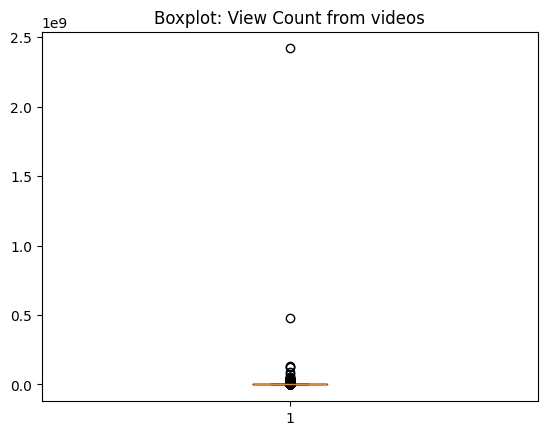

In [332]:
plt.boxplot(df_data['viewCount'].dropna().to_numpy())
plt.title('Boxplot: View Count from videos')

Text(0.5, 1.0, 'Boxplot: Like Count from videos')

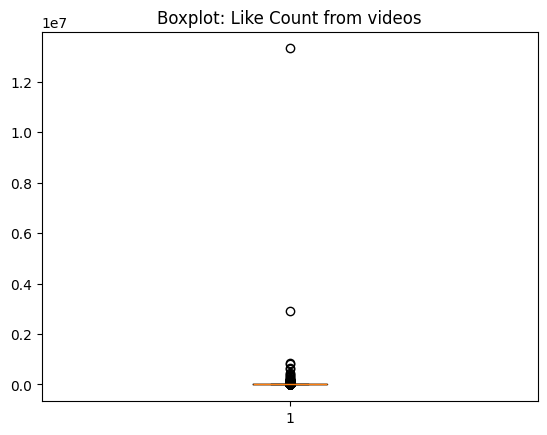

In [334]:
plt.boxplot(df_data['likeCount'].dropna().to_numpy())
plt.title('Boxplot: Like Count from videos')

Text(0.5, 1.0, 'Boxplot: Duration in Seconds from videos')

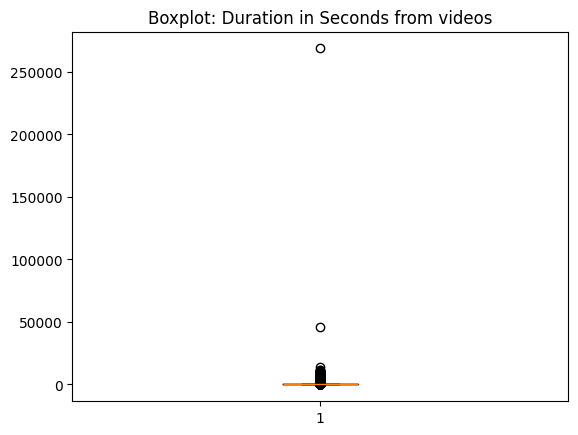

In [335]:
plt.boxplot(df_data['total_n_seconds'].dropna().to_numpy())
plt.title('Boxplot: Duration in Seconds from videos')

### Exploring Correlation between View Counts and Comment Counts

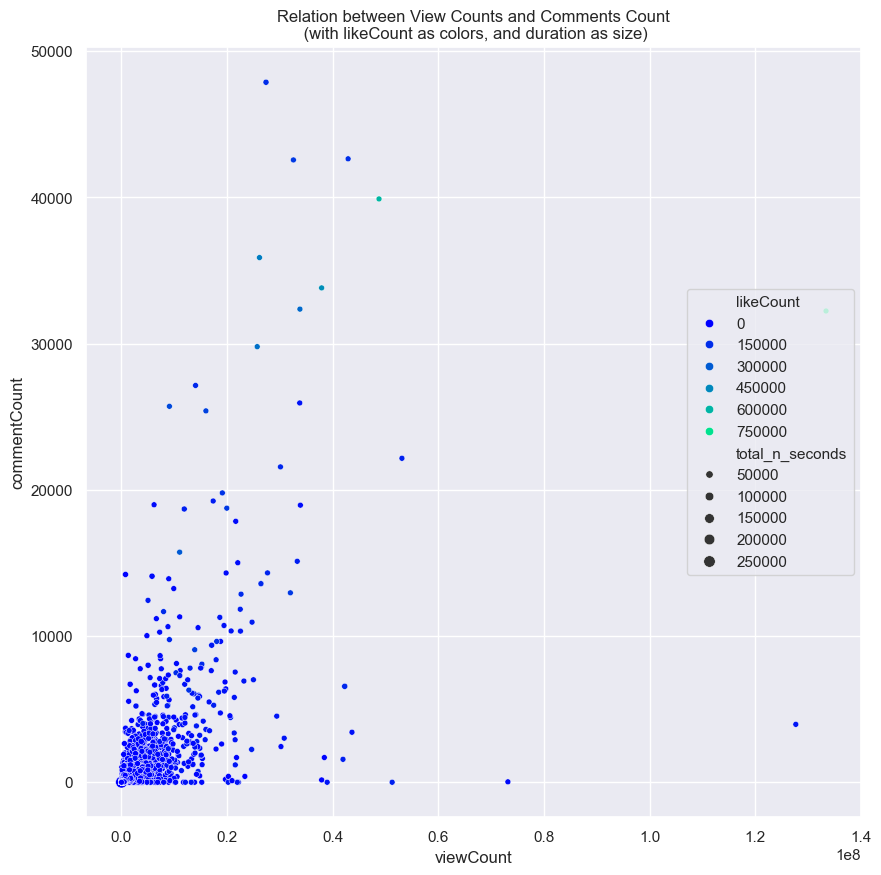

In [397]:
sns.set_theme(rc={'figure.figsize':(10,10)})
ax = sns.scatterplot(
    data=df_data.drop([15594, 17360, 16987, 14419]), x="viewCount", y="commentCount",
    hue="likeCount", size='total_n_seconds', palette = "winter"
)
ax.set_title("Relation between View Counts and Comments Count\n (with likeCount as colors, and duration as size)")
sns.move_legend(ax, "center right")

### Data Collection & Cleansing

1.	~100 comments~
2.	~Description of the video~
3.	~View Count~
4.	~Like Count~
5.	~Dislike Count~
6.	~Comment Count~
7.	~Duration of the video~
8.	~Favorite Count~

### Exploration Data Analysis

1.	A list of  the top-10 videos based on the total views
2.	A list of the bottom-10 videos based on the total views
3.	The most liked video
4.	The least liked video
5.	The video with the highest duration
6.	Apply sentiment analysis on the downloaded comments for each of the videos. For sentiment analysis, you can use VADER or any other tool of your choice. Your program should list the sentiments score for each of the movies


<a id="1"></a> 
## 1. Top 10 Videos based on total views

- **max_min_stat**: function to extract top 10 rows of a certain feature in ascending or descending order

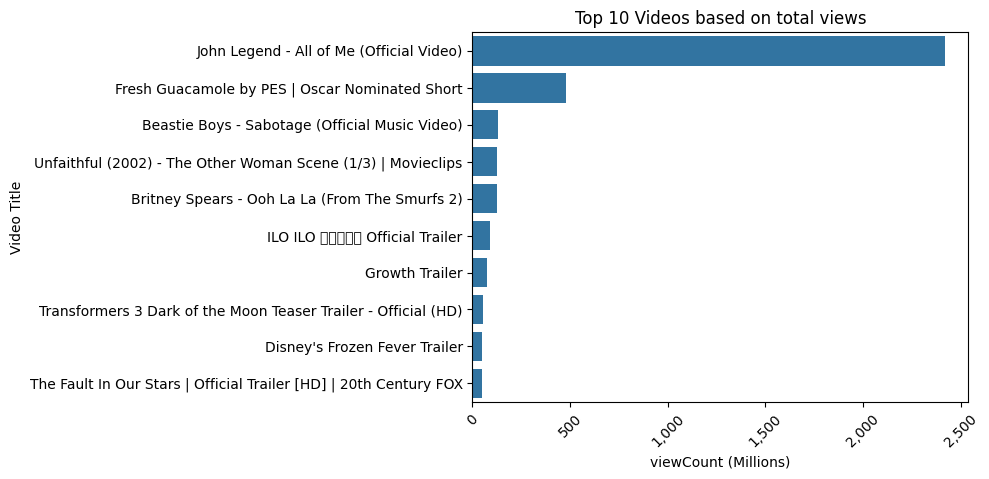

,title,viewCount
15594,John Legend - All of Me (Official Video),2.418630e+09
16987,Fresh Guacamole by PES | Oscar Nominated Short,4.800381e+08
17417,Beastie Boys - Sabotage (Official Music Video),1.334254e+08
3968,Unfaithful (2002) - The Other Woman Scene (1/3...,1.277029e+08
14419,Britney Spears - Ooh La La (From The Smurfs 2),1.250566e+08
16165,ILO ILO 爸媽不在家 Official Trailer,9.166847e+07
10592,Growth Trailer,7.317965e+07
11983,Transformers 3 Dark of the Moon Teaser Trailer...,5.311235e+07
17905,Disney's Frozen Fever Trailer,5.126004e+07
15711,The Fault In Our Stars | Official Trailer [HD]...,4.877254e+07


In [103]:
import warnings
import matplotlib
warnings.filterwarnings('ignore')

def max_min_stat(df, column, flag, scale=1, scale_text='', title=''):
    top_videos = df.sort_values(by = column, ascending = flag)[['title', column]].head(10)
    ax1 = sns.barplot(x = column, y = 'title', data = top_videos)
    ax1.get_xaxis().set_major_formatter(matplotlib.ticker.FuncFormatter(lambda x, p: format(int(x/scale), ',')))
    plt.xticks(rotation=45)
    x_label = column + f' ({scale_text})'*(scale != 1)
    plt.xlabel(x_label)
    plt.ylabel('Video Title')
    plt.title(title)
    plt.show()
    return top_videos

max_min_stat(df_data, 'viewCount', 0, scale=1000000, scale_text='Millions', title='Top 10 Videos based on total views')

<a id="2"></a> 
## 2. Bottom 10 Videos based on total views

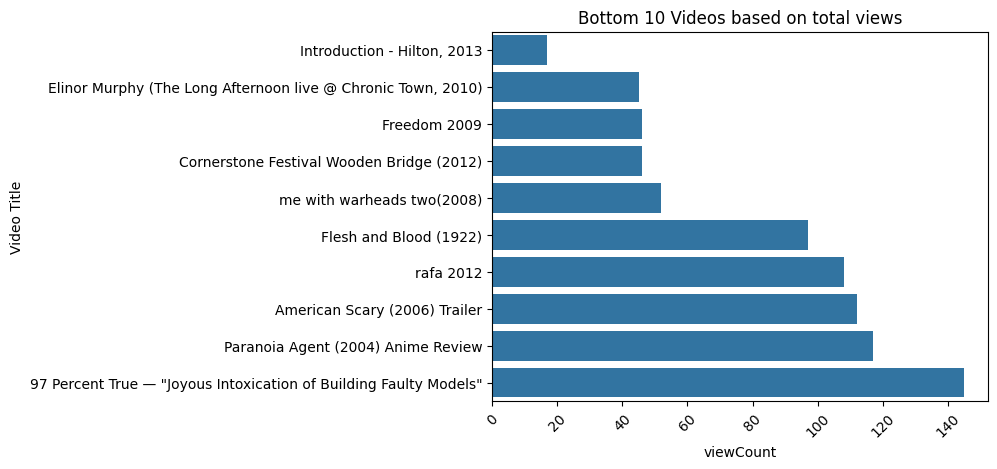

,title,viewCount
14173,"Introduction - Hilton, 2013",17.0
17855,Elinor Murphy (The Long Afternoon live @ Chron...,45.0
16468,Freedom 2009,46.0
15011,Cornerstone Festival Wooden Bridge (2012),46.0
15470,me with warheads two(2008),52.0
16901,Flesh and Blood (1922),97.0
14389,rafa 2012,108.0
15131,American Scary (2006) Trailer,112.0
15229,Paranoia Agent (2004) Anime Review,117.0
13505,"97 Percent True — ""Joyous Intoxication of Buil...",145.0


In [104]:
max_min_stat(df_data, 'viewCount', 1, title='Bottom 10 Videos based on total views')

<a id="3"></a> 
## 3. Top 10 most liked videos

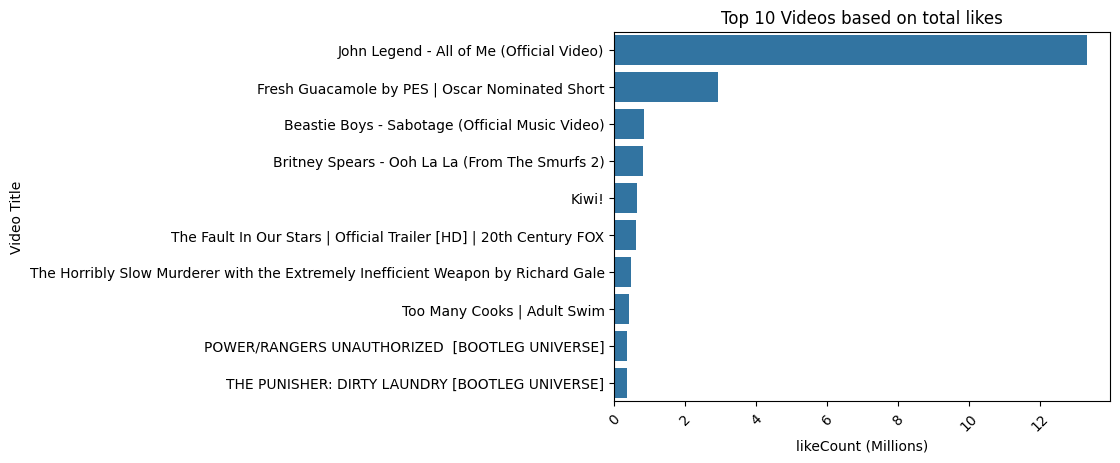

,title,likeCount
15594,John Legend - All of Me (Official Video),13320784.0
16987,Fresh Guacamole by PES | Oscar Nominated Short,2922334.0
17417,Beastie Boys - Sabotage (Official Music Video),850551.0
14419,Britney Spears - Ooh La La (From The Smurfs 2),811610.0
17360,Kiwi!,653887.0
15711,The Fault In Our Stars | Official Trailer [HD]...,609669.0
17413,The Horribly Slow Murderer with the Extremely ...,474012.0
16486,Too Many Cooks | Adult Swim,415286.0
17963,POWER/RANGERS UNAUTHORIZED [BOOTLEG UNIVERSE],369971.0
16822,THE PUNISHER: DIRTY LAUNDRY [BOOTLEG UNIVERSE],346486.0


In [114]:
max_min_stat(df_data, 'likeCount', 0, scale=1000000, scale_text='Millions', title='Top 10 Videos based on total likes')

### **Title with most likes**

In [139]:
df_data.iloc[15594]

title                       John Legend - All of Me (Official Video)
desc               Official music video for “All of Me” by John L...
Date                                                      2013-10-02
comments           [{'comment': '極少數黑人裡(美國) 不是穿耳洞屁孩 噁爛種<br>簡直是極品'...
duration                                                      PT5M8S
viewCount                                               2418630315.0
likeCount                                                 13320784.0
commentCount                                                258818.0
favoriteCount                                                      0
time_cleaned                                         0 days 00:05:08
Days                                                               0
Hours                                                              0
Minutes                                                            5
Seconds                                                            8
total_n_seconds                   

<a id="4"></a> 
## 4. Top 10 least liked videos

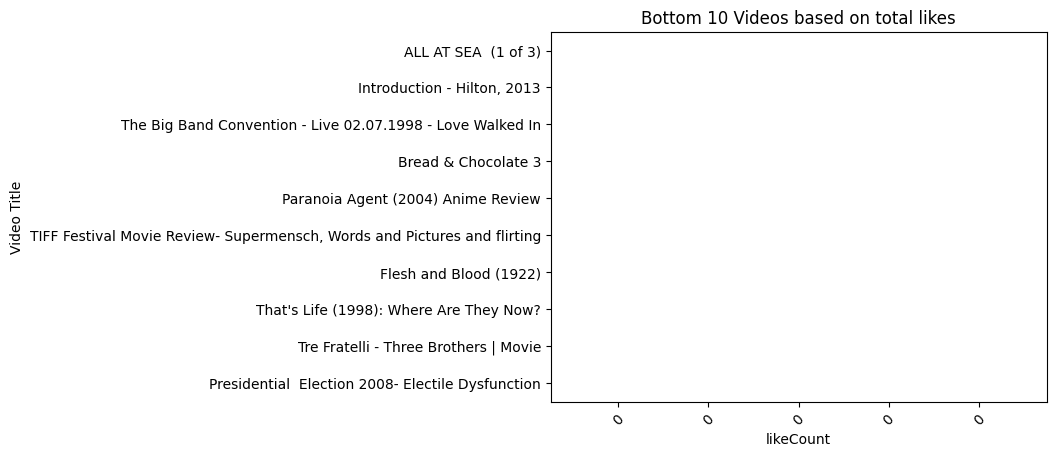

,title,likeCount
6286,ALL AT SEA (1 of 3),0.0
14173,"Introduction - Hilton, 2013",0.0
1359,The Big Band Convention - Live 02.07.1998 - Lo...,0.0
489,Bread & Chocolate 3,0.0
15229,Paranoia Agent (2004) Anime Review,0.0
17048,"TIFF Festival Movie Review- Supermensch, Words...",0.0
16901,Flesh and Blood (1922),0.0
17842,That's Life (1998): Where Are They Now?,0.0
12005,Tre Fratelli - Three Brothers | Movie,0.0
13637,Presidential Election 2008- Electile Dysfunction,0.0


In [115]:
max_min_stat(df_data, 'likeCount', 1, title='Bottom 10 Videos based on total likes')

### **Title with least likes**

In [140]:
df_data.iloc[6286]

title                                           ALL AT SEA  (1 of 3)
desc               video von Patrick Rieve. film ist teil der ins...
Date                                                      2010-12-29
comments                                                          []
duration                                                     PT9M27S
viewCount                                                      366.0
likeCount                                                        0.0
commentCount                                                     0.0
favoriteCount                                                      0
time_cleaned                                         0 days 00:09:27
Days                                                               0
Hours                                                              0
Minutes                                                            9
Seconds                                                           27
total_n_seconds                   

## 4B (extra). Top 10 videos with most comments

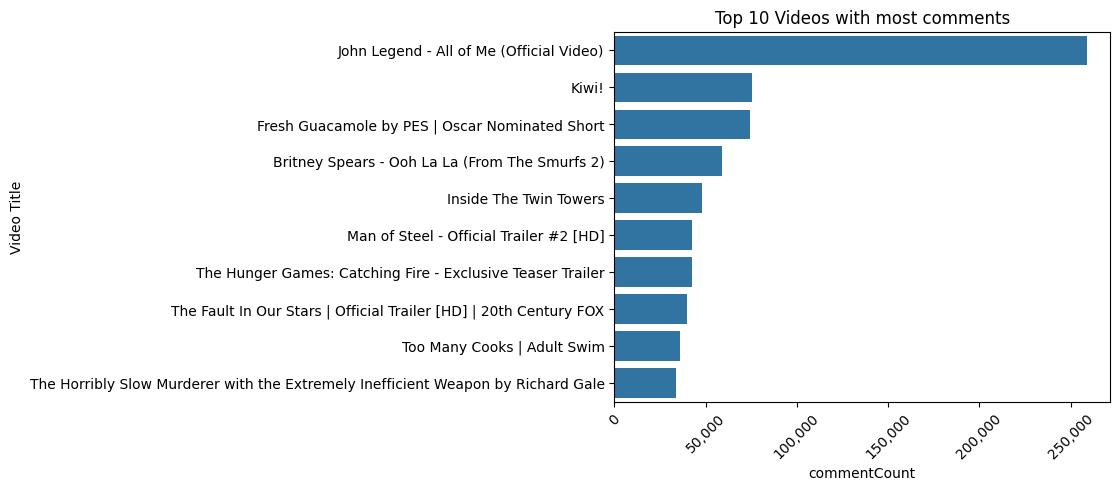

,title,commentCount
15594,John Legend - All of Me (Official Video),258818.0
17360,Kiwi!,75412.0
16987,Fresh Guacamole by PES | Oscar Nominated Short,74179.0
14419,Britney Spears - Ooh La La (From The Smurfs 2),59213.0
10882,Inside The Twin Towers,47878.0
14211,Man of Steel - Official Trailer #2 [HD],42642.0
14845,The Hunger Games: Catching Fire - Exclusive Te...,42564.0
15711,The Fault In Our Stars | Official Trailer [HD]...,39897.0
16486,Too Many Cooks | Adult Swim,35886.0
17413,The Horribly Slow Murderer with the Extremely ...,33812.0


In [358]:
max_min_stat(df_data, 'commentCount', 0, title='Top 10 Videos with most comments')

<a id="5"></a> 
## 5. Top 10 videos with highest duration

**First** we explore some specific duration values and display them.

In [132]:
max_duration = df_data['time_cleaned'].max()
min_duration = df_data['time_cleaned'].min()
mean_duration = df_data['time_cleaned'].mean()
median_duration = df_data['time_cleaned'].median()
total_duration = df_data['time_cleaned'].sum()

In [130]:
print('- Highest duration:')
display(max_duration)

print('- Shortest duration:')
display(min_duration)

print('- Mean from all durations:')
display(mean_duration)

print('- Median from all durations:')
display(median_duration)

print('- Sum of durations:')
display(total_duration)

- Highest duration:


Timedelta('3 days 02:40:22')

- Shortest duration:


Timedelta('0 days 00:00:01')

- Mean from all durations:


Timedelta('0 days 00:06:40.005769764')

- Median from all durations:


Timedelta('0 days 00:02:09')

- Sum of durations:


Timedelta('83 days 10:48:24')

**Second** we actually identify the top videos with highest durations.

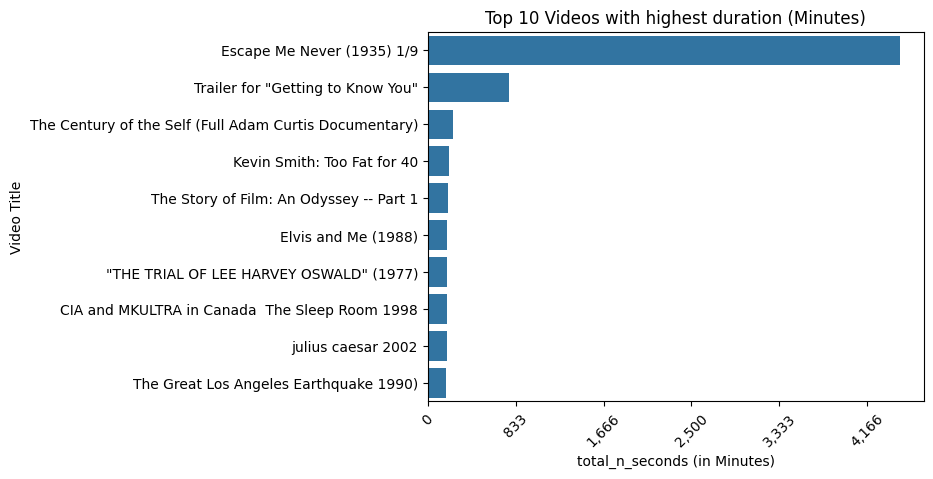

,title,total_n_seconds
17258,Escape Me Never (1935) 1/9,268822.0
12536,"Trailer for ""Getting to Know You""",46164.0
14625,The Century of the Self (Full Adam Curtis Docu...,14084.0
17253,Kevin Smith: Too Fat for 40,11969.0
17564,The Story of Film: An Odyssey -- Part 1,11466.0
17077,Elvis and Me (1988),11047.0
17626,"""THE TRIAL OF LEE HARVEY OSWALD"" (1977)",11003.0
15207,CIA and MKULTRA in Canada The Sleep Room 1998,10740.0
15884,julius caesar 2002,10658.0
17732,The Great Los Angeles Earthquake 1990),10654.0


In [137]:
max_min_stat(df_data, 'total_n_seconds', 0, scale=60, scale_text='in Minutes', title='Top 10 Videos with highest duration (Minutes)')

### **Title with longest duration**

In [138]:
df_data.iloc[17258]

title                                     Escape Me Never (1935) 1/9
desc               Elisabeth Bergner received an Academy Award no...
Date                                                      2011-09-10
comments           [{'comment': 'Please posting in legends portug...
duration                                                P3DT2H40M22S
viewCount                                                    10938.0
likeCount                                                       20.0
commentCount                                                     8.0
favoriteCount                                                      0
time_cleaned                                         3 days 02:40:22
Days                                                               3
Hours                                                              2
Minutes                                                           40
Seconds                                                           22
total_n_seconds                   

<a id="6"></a> 
## 6. Sentiment Analysis on extracted comments from all videos

- **extract_comments**: function to get comments from the dictionary where we scrapped the comments

In [158]:
# This function will helps in getting all the comments for pre-processing step 
import ast 

def extract_comments(dic):
    try:
        # using abstract syntax tree method on retriving the objcts present here
        temp1 = ast.literal_eval(dic) if isinstance(dic, str) and dic.startswith('[') else dic
        if isinstance(temp1, list): 
            return [comm.get('comment') for comm in temp1 if isinstance(comm, dict) and 'comment' in comm]      
    except (ValueError, SyntaxError):  
        print("issue agin")
        pass
    return None 

df_data['extracted_values'] = df_data['comments'].apply(extract_comments)
df_data[list(reversed(df_data.columns.to_list()))].tail()

,sentiment_score,token_text,cleaned_comments,extracted_values,day,total_n_seconds,Seconds,Minutes,Hours,Days,time_cleaned,favoriteCount,commentCount,likeCount,viewCount,duration,comments,Date,desc,title
18020,0.0000,песня би2 реки любви идеально подходит под это...,"[песня би-2, ""реки любви"" идеально подходит по...","[Песня Би-2, &quot;Реки любви&quot; идеально п...",15,150.0,30,2,0,0,0 days 00:02:30,0,28.0,380.0,513404.0,PT2M30S,"[{'comment': 'Песня Би-2, &quot;Реки любви&quo...",2010-01-15,"От создателей фильмов ""День выборов"" и ""День р...",О чем говорят мужчины-Трейлер
18021,0.0000,,[],[],11,135.0,15,2,0,0,0 days 00:02:15,0,0.0,6.0,1996.0,PT2M15S,[],2012-06-11,,Three Quarter Moon Trailer
18022,0.0000,,None,None,04,86.0,26,1,0,0,0 days 00:01:26,0,NaN,NaN,1809800.0,PT1M26S,comments_disabled,2012-01-04,Kenai takes an exciting adventure he never dre...,Brother Bear 2
18023,0.9380,too bad training video cant be more like this ...,[too bad training videos can't be more like th...,[Too bad training videos can&#39;t be more lik...,12,560.0,20,9,0,0,0 days 00:09:20,0,1643.0,32150.0,2578896.0,PT9M20S,[{'comment': 'Too bad training videos can&#39;...,2010-06-12,Crazy German video about forklift driver safety,Forklift Driver Klaus English Subtitles
18024,0.9996,this film fascinates me i have never felt such...,[this film fascinates me i have never felt suc...,[this film fascinates me I have never felt suc...,13,153.0,33,2,0,0,0 days 00:02:33,0,1012.0,23037.0,9409449.0,PT2M33S,[{'comment': 'this film fascinates me I have n...,2013-09-13,A young woman discovers her elite Manhattan pr...,INNOCENCE (2014) - Official Movie Trailer 1


**Text pre-processing for text cleaning on our comments**
- **emoji_stackoverflow**: function to compile emojis from our extracted comments
- **prep_main**: function for pre-processing module for text data
- **process_sec**: secondary function to finish pre-processing the comments data

In [164]:
import re
from html import unescape 

def emoji_stackoverflow(text):
    emoji_pattern = re.compile(
        "["
        "\U0001F600-\U0001F64F"  # emoticons
        "\U0001F300-\U0001F5FF"  # symbols & pictographs
        "\U0001F680-\U0001F6FF"  # transport & map symbols
        "\U0001F1E0-\U0001F1FF"  # flags (iOS)
        "\U00002702-\U000027B0"
        "\U000024C2-\U0001F251"
        "]+",
        flags=re.UNICODE
    ) 
    ## this method is referenced from a stackover flow thread to catch exceptions
    text=emoji_pattern.sub(r'', text)
    return ''.join(char for char in text if ord(char) < 0x10000)
    # emoji_pattern = emoji.get_emoji_regexp()
    # text = re.sub(r'[^a-zA-Z0-9\s]+', '', re.sub(emoji_pattern, lambda match: match.group(0), text))
    # return text

def prep_main(text):
    if not isinstance(text, str):  
        return text
    
    # timestamp and urls in comments
    text = re.sub(r'<.*?>', '', text)
    
    #html tags
    text = unescape(text)
    
    # few more urls
    text = re.sub(r'http\S+|www\S+|https\S+', '', text, flags=re.MULTILINE)
    
    # emojis
    text = emoji_stackoverflow(text)
    
    #small case
    text = text.lower()
    
    # extra space 
    text = re.sub(r'\s+', ' ', text).strip()  
    
    return text

## iterating through all the comments in row
def preprocess_sec(comment_list):
    if isinstance(comment_list, list):
        return [prep_main(comment) for comment in comment_list]
    return comment_list

df_data['cleaned_comments'] = df_data['extracted_values'].apply(preprocess_sec)

**Pre-processing texts into a usable format by applying:**
- word tokenization
- lemmatization

In [147]:
import nltk
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from nltk.sentiment import SentimentIntensityAnalyzer
lemmatizer = WordNetLemmatizer()
def token_(text):
    if text is None:  # Check if the input is None
        return ""  # Return an empty string or handle as appropriate
    
    text = str(text)
    # remove the comms and other punct
    text = re.sub(r'[^\w\s]', '', text)
    
    # Tokenize the text
    tokens = word_tokenize(text)
    
    # Lemmatize
    lemmatized = [lemmatizer.lemmatize(word) for word in tokens]
    
    # list to str
    return ' '.join(lemmatized)

df_data['token_text'] = df_data['cleaned_comments'].apply(token_)

**Sentiment Analysis**
- **get_sentiment**: function to get the sentiment score from a text
- Our sentiment scores are saved into a new column on our original dataframe

In [162]:
from nltk.sentiment import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()

def get_sentiment(text):
    scores = analyzer.polarity_scores(text)['compound'] #getting only the comp score for the asisgnment
    return scores

df_data['sentiment_score'] = df_data['token_text'].apply(get_sentiment)
df_data[['title','sentiment_score']].tail()

,title,sentiment_score
18020,О чем говорят мужчины-Трейлер,0.0000
18021,Three Quarter Moon Trailer,0.0000
18022,Brother Bear 2,0.0000
18023,Forklift Driver Klaus English Subtitles,0.9380
18024,INNOCENCE (2014) - Official Movie Trailer 1,0.9996


### Plotting Top 10 and Bottom 10 Videos by Sentiment Analysis Score

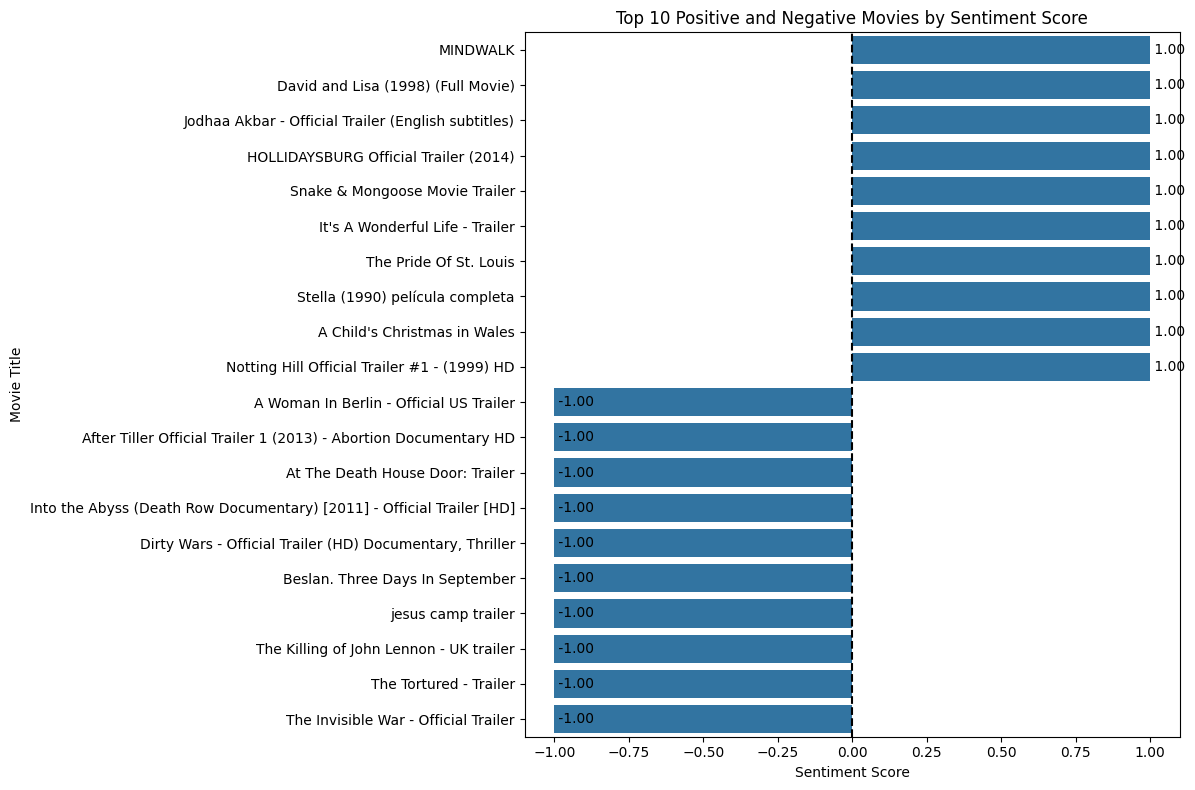

In [166]:
import matplotlib.pyplot as plt
import seaborn as sns

# Sorting the movie based on the sentiment score
sorted_df = df_data.sort_values('sentiment_score', ascending=False)
top_10 = sorted_df.head(10)
bottom_10 = sorted_df.tail(10)

# Combine into a single DataFrame
tab_con = pd.concat([top_10, bottom_10])

# Plot the bar chart
plt.figure(figsize=(12, 8))
ax=sns.barplot(x='sentiment_score', y='title', data=tab_con, orient='h')

# Set the labels and title
plt.title('Top 10 Positive and Negative Movies by Sentiment Score')
plt.xlabel('Sentiment Score')
plt.ylabel('Movie Title')

# Annotate sentiment scores
plt.axvline(x=0, color='black', linestyle='--')
for i, v in enumerate(tab_con['sentiment_score']):
    ax.text(v, i, f' {v:.2f}', va='center')
plt.tight_layout()
plt.show()

### **Title with best sentiment analysis score**

In [169]:
top_10.iloc[0]

title                                                        MINDWALK
desc                                                              NaN
Date                                                       2012-06-17
comments            [{'comment': 'I saw this the year it was relea...
duration                                                   PT1H48M43S
viewCount                                                    259398.0
likeCount                                                      2860.0
commentCount                                                    340.0
favoriteCount                                                       0
time_cleaned                                          0 days 01:48:43
Days                                                                0
Hours                                                               1
Minutes                                                            48
Seconds                                                            43
total_n_seconds     

### **Title with worst sentiment analysis score**

In [170]:
bottom_10.iloc[0]

title                         A Woman In Berlin - Official US Trailer
desc                Now Available on DVD - https://store.strandrel...
Date                                                       2009-05-08
comments            [{'comment': 'I like a good war movie especial...
duration                                                       PT2M9S
viewCount                                                    483474.0
likeCount                                                       806.0
commentCount                                                    365.0
favoriteCount                                                       0
time_cleaned                                          0 days 00:02:09
Days                                                                0
Hours                                                               0
Minutes                                                             2
Seconds                                                             9
total_n_seconds     

**Plotting more sentiment analysis scores from sampled videos**
- This will verify that not all of our scores are 1.0 or -1.0

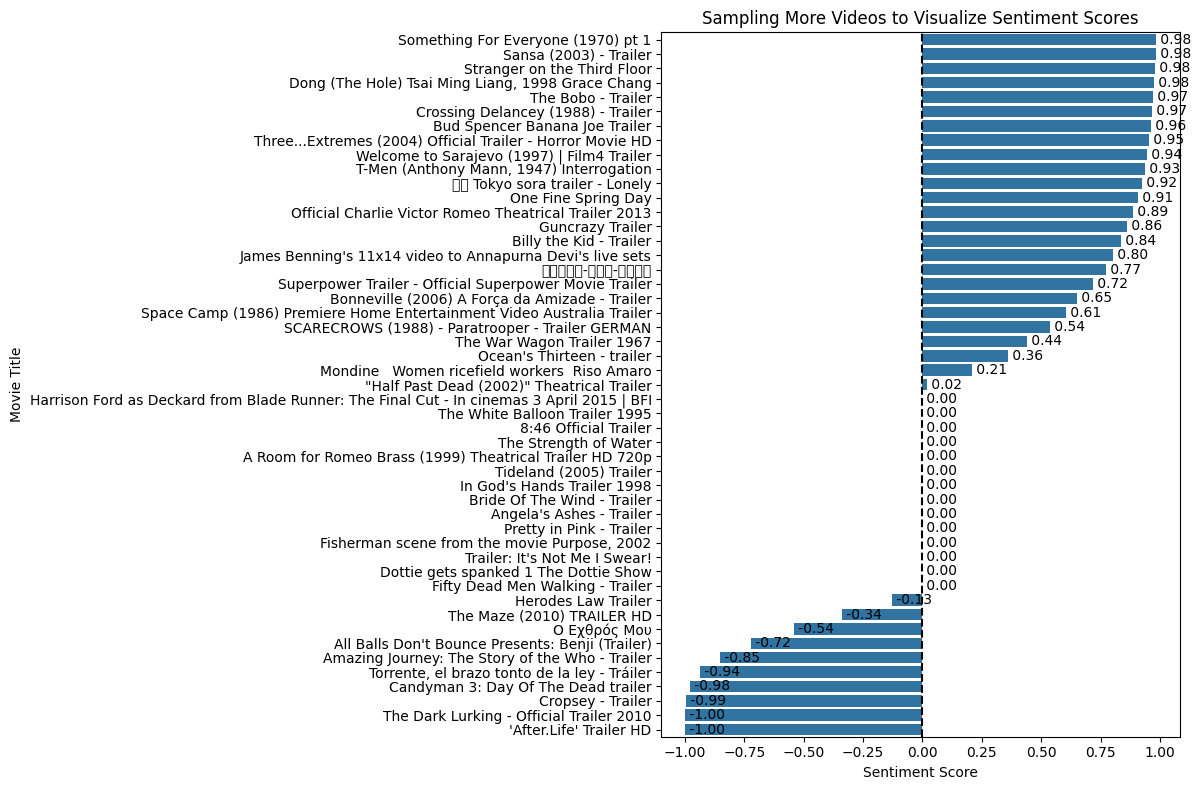

In [243]:
import matplotlib.pyplot as plt
import seaborn as sns

# Sampling and sorting the movie based on the sentiment score
sorted_df = df_data.sort_values('sentiment_score', ascending=False)
start_sample = int(0.4 * len(sorted_df))
step_sample = len(sorted_df)//80
sampled_df = sorted_df[start_sample: :step_sample]

# Plot the bar chart
plt.figure(figsize=(12, 8))
ax=sns.barplot(x='sentiment_score', y='title', data=sampled_df, orient='h')

# Set the labels and title
plt.title('Sampling More Videos to Visualize Sentiment Scores')
plt.xlabel('Sentiment Score')
plt.ylabel('Movie Title')

# Annotate sentiment scores
plt.axvline(x=0, color='black', linestyle='--')
for i, v in enumerate(sampled_df['sentiment_score']):
    ax.text(v, i, f' {v:.2f}', va='center')
plt.tight_layout()
plt.show()

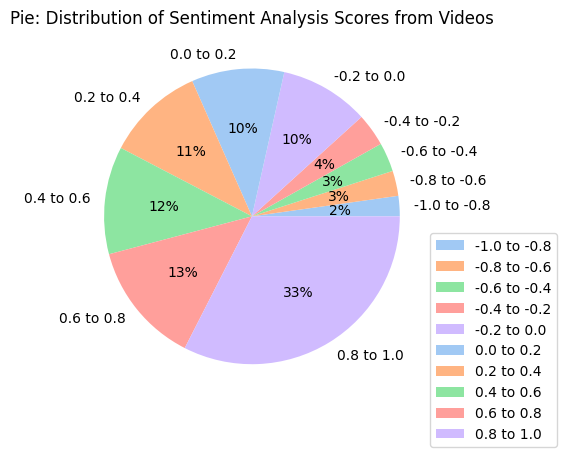

In [298]:
# Define the bins limits for the pie chart
bins_limits = [x / 10.0 for x in range(-8, 11, 2)]
sentiment_scores = list(df_data['sentiment_score'])

# Count the scores that fall under each bin
dict_counts = {}
for score in sentiment_scores:
    for limit in bins_limits:
        if score <= limit:
            dict_counts[limit] = dict_counts.get(limit, 0) + 1

# Set the counts and labels for the pie chart
counts = [dict_counts[key] for key in bins_limits]
labels = list(map(str, bins_limits))
labels = list(map(lambda x : f"{round(float(x)-0.2,2)} to {x}", labels))

# Define Seaborn color palette to use, and labels
colors = sns.color_palette('pastel')[0:5]
plt.title('Pie: Distribution of Sentiment Analysis Scores from Videos')

# Plot pie chart and legend
pie = plt.pie(counts, labels = labels, colors = colors, autopct='%.0f%%')
plt.legend()
plt.legend(pie[0],labels, bbox_to_anchor=(1,0), loc="lower right", 
                          bbox_transform=plt.gcf().transFigure)
plt.show()

(array([ 1232.,   291.,   242.,   219.,   143.,  3492.,   331.,   580.,
          881., 10614.]),
 array([-1. , -0.8, -0.6, -0.4, -0.2,  0. ,  0.2,  0.4,  0.6,  0.8,  1. ]),
 <BarContainer object of 10 artists>)

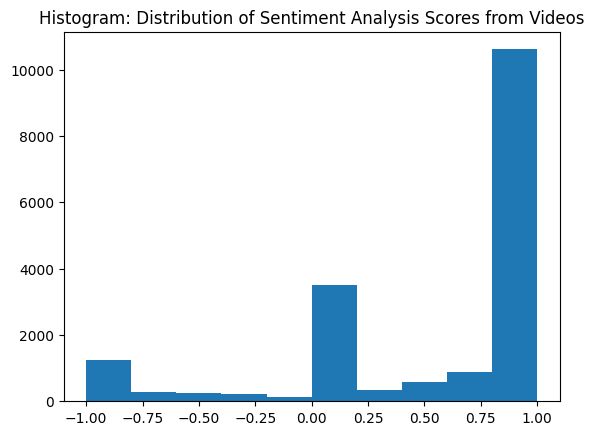

In [299]:
plt.title('Histogram: Distribution of Sentiment Analysis Scores from Videos')
plt.hist(sentiment_scores)

### Veryifing sentiment score from the best and worst movie scores by displaying:

# Comments from the video with BEST sentiment analysis score

In [219]:
def display_comments_from_video(video_comments, chars_cap=150):
    score_comments = video_comments.replace("\'", '"')
    list_score_comments = re.findall(r'"comment": "(.*?)", "user_id"', score_comments)
    for i, comment in enumerate(list_score_comments):
        print(f"-- Comment #{i+1}: {comment[:chars_cap]}" + "... (comment continues)"*(len(comment)>chars_cap))

display_comments_from_video(top_10.iloc[0][3])

-- Comment #1: I saw this the year it was released. I have returned to it how many time since 1990?  Too many to count. It was a hopeful view of the world as it coul... (comment continues)
-- Comment #2: You can be deterministic and believe in relational systems. The deterministic view is the small picture, while the systemic view is the big picture. Y... (comment continues)
-- Comment #3: Our teacher screened this movie for us in class in art school. It changed my life.
-- Comment #4: I saw this film 30 years ago in university. After it ended, loads of us just stood around outside the theatre talking about what we&#39;d seen.
-- Comment #5: Love this movie and its haunting music.
-- Comment #6: A remarkably dense set of ideas. &quot;My Dinner with Andre&quot; - like. Love it.
-- Comment #7: &quot;But Remember...Life Feels Itself.&quot;<br>My Fav quote of the movie.
-- Comment #8: If you like this, My Dinner with Andre is a must-see.
-- Comment #9: Some intellectual academics are the m

###
###
###
###
###
# Comments from the video with WORST sentiment analysis score

In [220]:
display_comments_from_video(bottom_10.iloc[0][3])

-- Comment #1: I like a good war movie especially the russian made ones i watched about tanks etc. however Im debating if i want to watch this movie with such a heav... (comment continues)
-- Comment #2: I think the Russians should answer for this, how is it fair that they can brush such an atrocity under the rug?
-- Comment #3: They impure the aryan race
-- Comment #4: O filme alemão Uma Mulher em Berlim,de Max Färbeböck, é excelente!
-- Comment #5: They knew what their Nazi husbands and sons did in Rusia and around Europe a couple of years ago, and were afraid of justice. Shame so many Nazis surv... (comment continues)
-- Comment #6: Bucha...
-- Comment #7: hm
-- Comment #8: I watched many movies and TV series about World War II. Whichever way I look at it, it&#39;s a different drama. But the truth is whoever took the powe... (comment continues)
-- Comment #9: Hollywood must show how The Allies raped german women.
-- Comment #10: Bullshit Nazi apologist movie. Most of such accounts a